# Initial Package Install

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import raindownloader

In [3]:
raindownloader

<module 'raindownloader' from '/Users/cordmaur/Projects/INPERainDownloader/raindownloader/__init__.py'>

In [4]:
raindownloader.version

'0.1.1'

# Accessing INPE "FTP"

An important note about the INPE "FTP" is that the files are available under the HTTP protocol, so we cannot use FTP here. <br>
After some research I found out the best option to do this is to use a BeautifulSoup to parse the directory content.

In [5]:
from bs4 import BeautifulSoup
import requests
from raindownloader.http_utils import HTTPFileSystem, HTTPFile, Urls

In [6]:
url = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'
fs = HTTPFileSystem(url)
fs.links[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/" href="2000/">2000/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2001/" href="2001/">2001/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2002/" href="2002/">2002/</a>]

In [7]:
fs.files[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2000_2022.ctl" href="MERGE_CPTEC_2000_2022.ctl">MERGE_CPTEC_2000_2022.ctl</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2000_2022.idx" href="MERGE_CPTEC_2000_2022.idx">MERGE_CPTEC_2000_2022.idx</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/MERGE_CPTEC_2023.ctl" href="MERGE_CPTEC_2023.ctl">MERGE_CPTEC_2023.ctl</a>]

In [8]:
fs.folders[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/" href="2000/">2000/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2001/" href="2001/">2001/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2002/" href="2002/">2002/</a>]

In [9]:
fs.url

'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'

In [10]:
fs.open_folder('2000/').folders

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/06/" href="06/">06/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/07/" href="07/">07/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/08/" href="08/">08/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/09/" href="09/">09/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/10/" href="10/">10/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/11/" href="11/">11/</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2000/12/" href="12/">12/</a>]

In [11]:
httpfile = HTTPFile(fs.files[0].get('abs_href'))

In [12]:
# httpfile.info

# Now parsing with INPE structure

In [13]:
from raindownloader.http_utils import INPEHTTPFileSystem, MERGEFile

In [14]:
inpe = INPEHTTPFileSystem(Urls.MERGE)

In [15]:
inpe.years[:3]

['2000', '2001', '2002']

In [16]:
inpe.months_by_year(year='2023')

['01', '02']

In [17]:
inpe.files_by_month(year='2023', month='02')[:3]

[<a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230201.grib2" href="MERGE_CPTEC_20230201.grib2">MERGE_CPTEC_20230201.grib2</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230202.grib2" href="MERGE_CPTEC_20230202.grib2">MERGE_CPTEC_20230202.grib2</a>,
 <a abs_href="http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230203.grib2" href="MERGE_CPTEC_20230203.grib2">MERGE_CPTEC_20230203.grib2</a>]

In [18]:
inpe.dates_by_month(year='2023', month='02')[:3]

[datetime.datetime(2023, 2, 1, 0, 0),
 datetime.datetime(2023, 2, 2, 0, 0),
 datetime.datetime(2023, 2, 3, 0, 0)]

In [30]:
merge = inpe.get_file('20230228')

Exception: No '.grib2' files found for date 20230228

In [20]:
merge.info

{'Server': 'Apache',
 'Last-Modified': datetime.datetime(2023, 2, 28, 1, 39, 31, tzinfo=tzutc()),
 'ETag': '"75820-5f5b8aabf3ac0"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '481312',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive',
 'Request_time': datetime.datetime(2023, 2, 28, 14, 16, 57, tzinfo=tzutc()),
 'model': 'MERGE',
 'provider': 'CPTEC',
 'date': datetime.datetime(2023, 2, 27, 0, 0),
 'ext': 'grib2'}

In [21]:
merge.header

{'Date': 'Tue, 28 Feb 2023 14:16:57 GMT',
 'Server': 'Apache',
 'Last-Modified': 'Tue, 28 Feb 2023 01:39:31 GMT',
 'ETag': '"75820-5f5b8aabf3ac0"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '481312',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive'}

In [22]:
merge.filename

'MERGE_CPTEC_20230227.grib2'

In [24]:
import xarray as xr

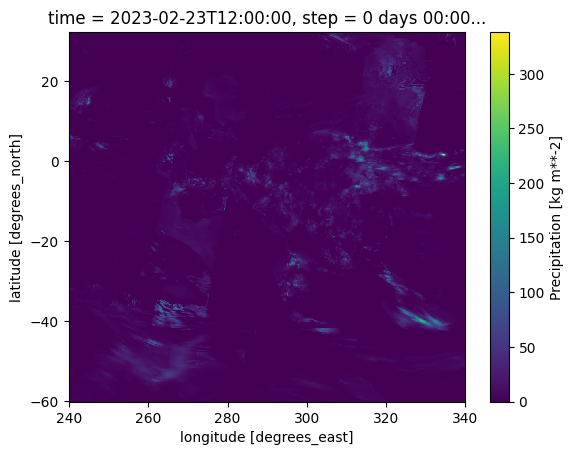

In [34]:
inpe = INPEHTTPFileSystem(Urls.MERGE)
rain = inpe.get_file('20230223')
path = rain.download('../tests/data')
ds = xr.open_dataset(path, engine='cfgrib')

ds['prec'].plot()

In [26]:
ds = xr.open_dataset(f, engine='cfgrib')

In [29]:
ds['prec']

<xarray.DataArray 'prec' (latitude: 924, longitude: 1001)>
[924924 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 -60.05 -59.95 -59.85 ... 32.05 32.15 32.25
  * longitude   (longitude) float64 239.9 240.0 240.1 ... 339.8 339.9 339.9
    valid_time  datetime64[ns] ...
Attributes: (12/29)
    GRIB_paramId:                             260138
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      924924
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Precipitation
    GRIB_shortName:                           prec
    GRIB_units:                               kg m**-2
    long_name:                                Precipitation
    units:                                    kg m**-2
    standard_name:                            unknown

In [60]:
from pathlib import Path
p = Path('.')

In [62]:
p.is_absolute()

False

In [63]:
p.mkdir?

Signature: p.mkdir(mode=511, parents=False, exist_ok=False)
Docstring: Create a new directory at this given path.
File:      ~/miniconda3/envs/geopandas38/lib/python3.8/pathlib.py
Type:      method

In [31]:
merge = MERGEFile('http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230203.grib2')

In [32]:
merge.header

{'Date': 'Tue, 28 Feb 2023 13:18:07 GMT',
 'Server': 'Apache',
 'Last-Modified': 'Tue, 14 Feb 2023 18:43:28 GMT',
 'ETag': '"50ba5-5f4ad56e63400"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '330661',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive'}

In [33]:
merge.info

{'Server': 'Apache',
 'Last-Modified': datetime.datetime(2023, 2, 14, 18, 43, 28, tzinfo=tzutc()),
 'ETag': '"50ba5-5f4ad56e63400"',
 'Accept-Ranges': 'bytes',
 'Content-Length': '330661',
 'Access-Control-Allow-Origin': '*',
 'Keep-Alive': 'timeout=5, max=100',
 'Connection': 'Keep-Alive',
 'Request_time': datetime.datetime(2023, 2, 28, 13, 18, 7, tzinfo=tzutc()),
 'model': 'MERGE',
 'provider': 'CPTEC',
 'date': datetime.datetime(2023, 2, 3, 0, 0),
 'ext': 'grib2'}

In [77]:
class HTTPFile:
    def __init__(self, url: str) -> None:
        if url.endswith("/"):
            raise Exception(f"{url} is not a valid file")

        self.url = url
        
class MERGEFile(HTTPFile):
    def __init__(self, url: str) -> None:
        super().__init__(url)

MERGEFile('teste')

In [75]:
class Parent:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Child(Parent):
    def __init__(self, x, y, z):
        super().__init__(x, y)  # Call the __init__() method of the parent class
        self.z = z

# Create an instance of the Child class and print its attributes
c = Child(1, 2, 3)
print(c.x)
print(c.y)
print(c.z)


1
2
3


In [48]:
inpe.dates_by_month(year='2023', month='02')[:3]

[datetime.datetime(2023, 2, 1, 0, 0),
 datetime.datetime(2023, 2, 2, 0, 0),
 datetime.datetime(2023, 2, 3, 0, 0)]

In [54]:
from dateutil.parser import parse
dt = parse('20230201')

In [60]:
str(dt.month)

'2'

In [53]:
from urllib.parse import urljoin
urljoin(fs.url, '2001')

'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2001'

In [61]:
dt.strftime('%Y%m%d')

'20230201'

In [77]:
type(inpe.fs.links[0])

bs4.element.Tag

In [68]:
inpe.get_months('2001')

['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [63]:
inpe.dates_by_month(year='2001', month='1')[:3]

[datetime.datetime(2001, 1, 1, 0, 0),
 datetime.datetime(2001, 1, 2, 0, 0),
 datetime.datetime(2001, 1, 3, 0, 0)]

In [70]:
inpe.get_file('20230201')

HTTP File at: http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/02/MERGE_CPTEC_20230201.grib2

In [65]:
tag

NameError: name 'tag' is not defined

In [15]:
url = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'
response = requests.get(url)
html_content = response.content.decode('utf-8')


In [16]:
response.raise_for_status()

In [9]:
soup = BeautifulSoup(html_content, 'html.parser')
links = soup.find_all('a')

In [28]:
l = links[10]

In [73]:
inpe.first_date

'20000602'

In [30]:
l.get('href')

'2005/'

In [10]:
links

[<a href="?C=N;O=D">Name</a>,
 <a href="?C=M;O=A">Last modified</a>,
 <a href="?C=S;O=A">Size</a>,
 <a href="?C=D;O=A">Description</a>,
 <a href="/modelos/tempo/MERGE/GPM/">Parent Directory</a>,
 <a href="2000/">2000/</a>,
 <a href="2001/">2001/</a>,
 <a href="2002/">2002/</a>,
 <a href="2003/">2003/</a>,
 <a href="2004/">2004/</a>,
 <a href="2005/">2005/</a>,
 <a href="2006/">2006/</a>,
 <a href="2007/">2007/</a>,
 <a href="2008/">2008/</a>,
 <a href="2009/">2009/</a>,
 <a href="2010/">2010/</a>,
 <a href="2011/">2011/</a>,
 <a href="2012/">2012/</a>,
 <a href="2013/">2013/</a>,
 <a href="2014/">2014/</a>,
 <a href="2015/">2015/</a>,
 <a href="2016/">2016/</a>,
 <a href="2017/">2017/</a>,
 <a href="2018/">2018/</a>,
 <a href="2019/">2019/</a>,
 <a href="2020/">2020/</a>,
 <a href="2021/">2021/</a>,
 <a href="2022/">2022/</a>,
 <a href="2023/">2023/</a>,
 <a href="MERGE_CPTEC_2000_2022.ctl">MERGE_CPTEC_2000_2022.ctl</a>,
 <a href="MERGE_CPTEC_2000_2022.idx">MERGE_CPTEC_2000_2022.idx</a

In [19]:
from dirhunt.utils 

<module 'dirhunt' from '/Users/cordmaur/miniconda3/envs/geopandas38/lib/python3.8/site-packages/dirhunt/__init__.py'>

In [14]:
import requests
from IPython.display import HTML

In [9]:
response = requests.get(ftp_url)

In [12]:
html_content = response.content.decode('utf-8')

In [15]:
HTML(html_content)

In [4]:
import ftplib

In [6]:
inpe_ftp = ftplib.FTP(ftp_url)

gaierror: [Errno 8] nodename nor servname provided, or not known

In [7]:
ftplib.FTP?

Init signature:
ftplib.FTP(
    host='',
    user='',
    passwd='',
    acct='',
    timeout=<object object at 0x10104d220>,
    source_address=None,
)
Docstring:     
An FTP client class.

To create a connection, call the class using these arguments:
        host, user, passwd, acct, timeout

The first four arguments are all strings, and have default value ''.
timeout must be numeric and defaults to None if not passed,
meaning that no timeout will be set on any ftp socket(s)
If a timeout is passed, then this is now the default timeout for all ftp
socket operations for this instance.

Then use self.connect() with optional host and port argument.

To download a file, use ftp.retrlines('RETR ' + filename),
or ftp.retrbinary() with slightly different arguments.
To upload a file, use ftp.storlines() or ftp.storbinary(),
which have an open file as argument (see their definitions
below for details).
The download/upload functions first issue appropriate TYPE
and PORT or PASV commands.
File: 